#1. Earth-Moon System.
For this point, the Earth-Moon system will be chosen, whose masses are:
$$m_{Earth}=5.9736\times 10^{24} \ kg$$
$$m_{Moon}=7.349\times 10^{22}\ kg$$

In [1]:
!python -m pip install astroquery > /dev/null 2>&1

In [2]:
from astroquery.jplhorizons import Horizons # Access to the solar system dynamics database
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from tabulate import tabulate

In [5]:
# Load data for Earth (399) and Moon (301) using Astroquery Horizons
n = 2
planet_ids = ["399", "301"]
planets = [None] * n
vectors = [None] * n
elements = [None] * n

# Define the observation time: 3 months with 1-day step
for i in range(n):
    planets[i] = Horizons(id=planet_ids[i], location="@0",
                          epochs={"start": "2020-01-01", "stop": "2020-04-01", "step": "1d"})
    vectors[i] = planets[i].vectors()

In [6]:
# Masses of Earth and Moon (in kg)
masses = [5.9736e24, 7.349e22]

# Gravitational constant (Nm²/kg²)
G = 6.67384e-11

# Reduced gravitational parameter (mu = G*(m1 + m2))
mu = G * sum(masses)

#2. Positions and speeds.

In [7]:
# Extract position and velocity components in meters and m/s
X, Y, Z = [None] * n, [None] * n, [None] * n
VX, VY, VZ = [None] * n, [None] * n, [None] * n

for i in range(n):
    X[i] = vectors[i]["x"].to("m").value
    Y[i] = vectors[i]["y"].to("m").value
    Z[i] = vectors[i]["z"].to("m").value
    VX[i] = vectors[i]["vx"].to("m/s").value
    VY[i] = vectors[i]["vy"].to("m/s").value
    VZ[i] = vectors[i]["vz"].to("m/s").value

In [21]:
# Convert to numpy arrays for vectorized operations
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
VX = np.array(VX)
VY = np.array(VY)
VZ = np.array(VZ)

# Compute relative position and velocity vectors between Earth and Moon
R_rel = np.stack([X[0] - X[1], Y[0] - Y[1], Z[0] - Z[1]], axis=1)
V_rel = np.stack([VX[0] - VX[1], VY[0] - VY[1], VZ[0] - VZ[1]], axis=1)

### 3.

For the specific relative angular momentum vector we have:

$$
\vec{h} = \vec{r} \times \dot{\vec{r}}
$$

Where $\vec{r}$ and $\dot{\vec{r}}$ are the relative position and velocity vectors of the system.  
For the specific relative energy we have:

$$
\varepsilon = \frac{1}{2} \dot{\vec{r}}^2 - \frac{\mu}{r}
$$

Where $\mu = G(m_1 + m_2)$ is the gravitational parameter of the system.  
Finally, for the Laplace (eccentricity) vector we have:

$$
\vec{e} = \frac{ \dot{\vec{r}} \times \vec{h} }{\mu} - \frac{ \vec{r} }{r}
$$


In [23]:
for i in range(92):
  h[i] = np.cross(R_rel[i], V_rel[i])         # specific relative angular momentum
  e[i] = 0.5 * np.dot(V_rel[i], V_rel[i]) - mu / np.linalg.norm(R_rel[i])  # specific relative energy
  vec_exc[i] = np.cross(V_rel[i], h[i]) / mu - R_rel[i] / np.linalg.norm(R_rel[i])  # Laplace (eccentricity) vector

In [15]:
t =  np.array([None]*92)
for i in range(92):
  t[i] = i
color = ["red","blue","purple"]
titleh = ["hx [$m^2/s$]","hy [$m^2/s$]","hz [$m^2/s$]"]
titlee = ["ex","ey","ez"]

In [16]:
t1 = np.zeros((14))
for i in range(14):
  t1[0] = 0
  t1[i] = t1[i-1]+7

In [24]:
# Create an array to store the dates
fechas = np.array([None] * 14)

# Date format: Year, Month, Day, Hour, Minute, Second, Millisecond
fecha_inicio = datetime(2021, 1, 1)

for i in range(14):
  fechas[i] = fecha_inicio
  fecha_inicio = fecha_inicio + timedelta(days=7)  # timedelta = "step" of the bodies
  fechas[i] = fechas[i].strftime('%Y %b %d')  # Display the name of the month instead of its number

<Figure size 640x480 with 0 Axes>

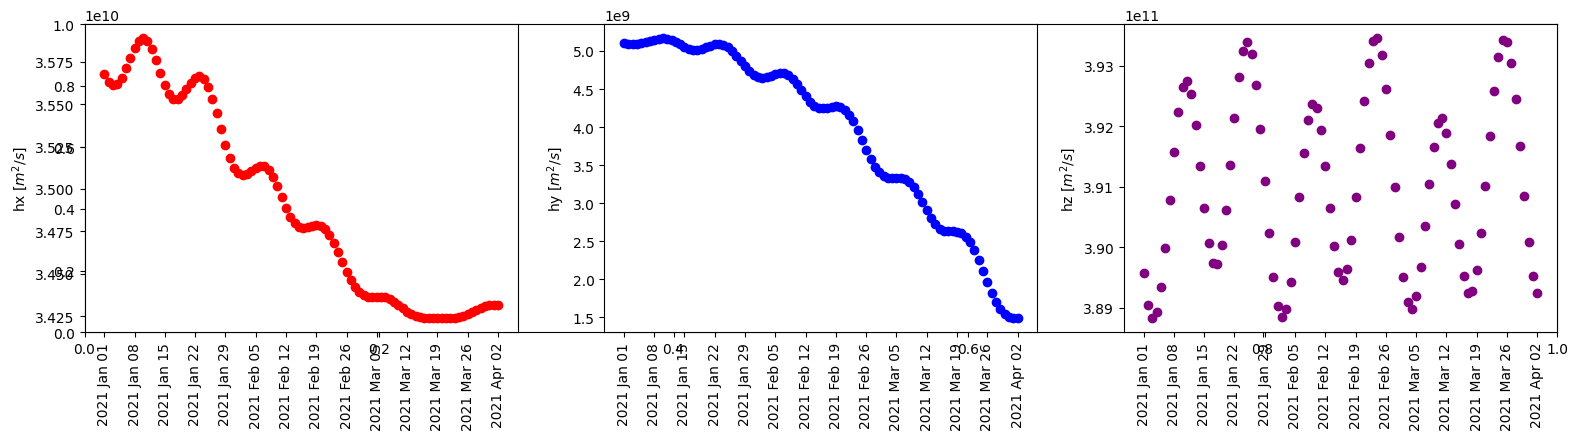

In [25]:
plt.figure()
plt.subplots(figsize=(19,4))

for g in range(0,3):
  plt.subplot(1,3,g+1)
  for i in range(92):
    plt.plot(t[i],h[i][g],"o",color=color[g])
    plt.xticks(t1, fechas, rotation ='vertical')
    if g==0:
      plt.ylabel(titleh[g])
    if g==1:
      plt.ylabel(titleh[g])
    if g==2:
      plt.ylabel(titleh[g])

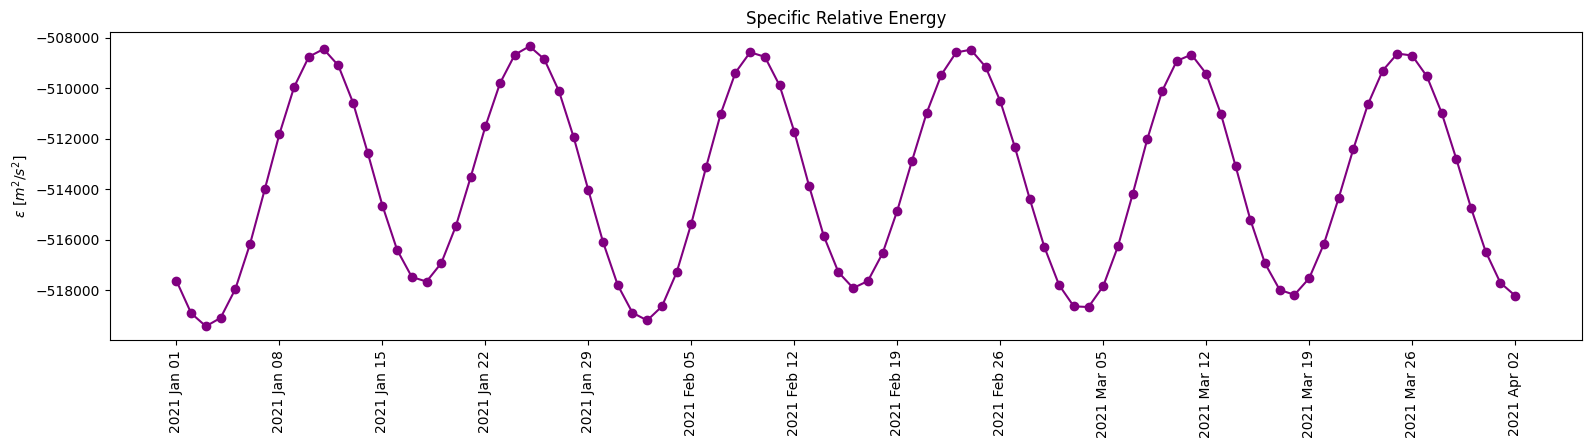

In [26]:
plt.figure(figsize=(19, 4))
plt.plot(t, e, "-o", color=color[2])
plt.title("Specific Relative Energy")
plt.xticks(t1, fechas, rotation='vertical')
plt.ylabel("$\epsilon \ [m^2/s^2]$")
plt.show()

<Figure size 640x480 with 0 Axes>

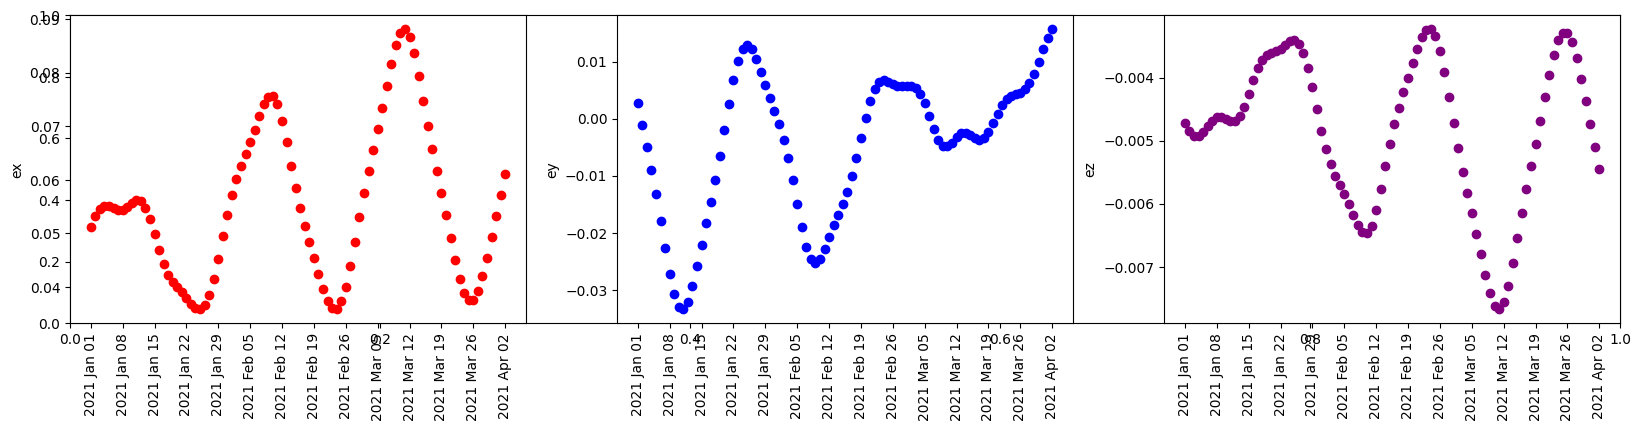

In [27]:
plt.figure()
plt.subplots(figsize=(20,4))

for g in range(0,3):
  plt.subplot(1,3,g+1)
  for i in range(92):
    plt.plot(t[i],vec_exc[i][g],"o",color=color[g])
    plt.xticks(t1, fechas, rotation ='vertical')
    if g==0:
      plt.ylabel(titlee[g])
    if g==1:
      plt.ylabel(titlee[g])
    if g==2:
      plt.ylabel(titlee[g])

We can conclude that the trajectory of the specific relative angular momentum vector of the Earth-Moon system defines an invariable plane, as expected, since its components are approximately constant and remain within the same order of magnitude.
It is also concluded that the system's relative energy and eccentricity are constant and show no significant variations in their values.


# 4.  
For the values of the eccentricity $(e)$, the semi-latus rectum $(p)$, and the semi-major axis $(a)$ of the relative orbit vector of the system, we have the following expressions:  

$$e = \sqrt{1+ \frac{2\in h^2}{\mu^2}}$$  
$$\in = -\frac{\mu}{2a} \Rightarrow a = -\frac{\mu}{2\in}$$  
$$p = \frac{h^2}{\mu}$$

In [28]:
h_prom = 0
e_prom = 0
for i in range(92):
  h[i] = np.linalg.norm(h[i])
  h_prom += h[i]
  e_prom += e[i]
h_prom , e_prom = h_prom/92, e_prom/92

In [29]:
excentricidad = np.sqrt(1+(2*e_prom*(h_prom/mu)**2))
a = -mu/(2*e_prom)
p = (h_prom**2)/mu

In [30]:
print("The eccentricity of the relative orbit vector is", excentricidad)
print("The semi-latus rectum of the relative orbit is", p, "m")
print("The semi-major axis of the relative orbit is", a, "m")

The eccentricity of the relative orbit vector is [0.05845184 0.05845184 0.05845184]
The semi-latus rectum of the relative orbit is [3.86685942e+08 3.86685942e+08 3.86685942e+08] m
The semi-major axis of the relative orbit is 388011628.87081134 m


Note that $0<e<1$ then the orbit of the relative vector describes an ellipse.

# 5.

At this point it should be remembered that $$q=\frac{p}{1+e} \Rightarrow p=q\ (1+e)$$

In [34]:
n = 2 # Number of bodies
planetas = np.array([None]*n)
tablas = np.array([None]*n)
elementos = np.array([None]*n)
nombre_planetas = ["399","301"]

for i in range(0,n):
  planetas[i] = Horizons(id=nombre_planetas[i],location="@Earth-Moon Barycenter",epochs={"start":"2020-04-01", "stop":"2022-04-29", "step":"1d"})
  elementos[i] = planetas[i].elements()

In [35]:
p_luna = np.array([None]*92)
p_tierra = np.array([None]*92)

for i in range(92):
  p_luna[i] = elementos[1]["q"][i]*(1+elementos[1]["e"][1])
  p_tierra[i] = elementos[0]["q"][i]*(1+elementos[0]["e"][0])

In [36]:
ePROM_luna, pPROM_luna, aPROM_luna = 0,0,0
ePROM_tierra, pPROM_tierra, aPROM_tierra = 0,0,0

for i in range(92):
  ePROM_luna += elementos[1]['e'][i]/92
  pPROM_luna += p_luna[i]/92
  aPROM_luna += elementos[1]['a'][i]/92

  ePROM_tierra += elementos[0]['e'][i]/92
  pPROM_tierra += p_tierra[i]/92
  aPROM_tierra += elementos[0]['a'][i]/92

In [37]:
print("Averaging these values we find:")
print("The eccentricity of the Moon's orbit is", ePROM_luna)
print("The semilatus rectum of the Moon's orbit is", pPROM_luna, "AU =", pPROM_luna * 1.496e8, "km")
print("The semi-major axis of the Moon's orbit is", aPROM_luna, "AU =", aPROM_luna * 1.496e8, "km")

Averaging these values we find:
The eccentricity of the Moon's orbit is 0.056266878834622995
The semilatus rectum of the Moon's orbit is 0.002547550766810368 AU = 381113.59471483104 km
The semi-major axis of the Moon's orbit is 0.002530887129489494 AU = 378620.7145716283 km


In [38]:
print("Averaging these values we find:")
print("The eccentricity of Earth's orbit is", ePROM_tierra)
print("The semilatus rectum of Earth's orbit is", pPROM_tierra, "AU =", pPROM_tierra * 1.496e8, "km")
print("The semi-major axis of Earth's orbit is", aPROM_tierra, "AU =", aPROM_tierra * 1.496e8, "km")

Averaging these values we find:
The eccentricity of Earth's orbit is 0.05626687883462414
The semilatus rectum of Earth's orbit is 3.1298570810322556e-05 AU = 4682.2661932242545 km
The semi-major axis of Earth's orbit is 3.1130005421295576e-05 AU = 4657.048811025818 km


By calculating the eccentricity of the orbit of the relative vector of the chosen system and the eccentricity of the Moon, we observe that in both cases we have $$e \approx 0.5$$.  
Furthermore, although $$p_{relative}$$ and $$p_{moon}$$ are not exactly equal, they yield very similar values (approximately $$3.81 \times 10^5 \ \text{km}$$ and $$3.79 \times 10^5 \ \text{km}$$, respectively).  
For $$a_{relative}$$ and $$a_{moon}$$ we also obtain values of $$3.83 \times 10^5 \ \text{km}$$ and $$3.78 \times 10^5 \ \text{km}$$.  
It makes sense that the Moon describes an orbit similar to that of the relative vector, since the latter takes into account both the mass of the Earth and that of the Moon (which is much smaller compared to the Earth's mass).
